In [102]:
%matplotlib inline

import os 
import time
import librosa
import librosa.display
import importlib
import matplotlib
import numpy as np
import string as strp
import pr_util as util

import matplotlib.pyplot as plt

In [74]:
y, sr = librosa.load('Rexp/100041.filtered1.wav')

178432


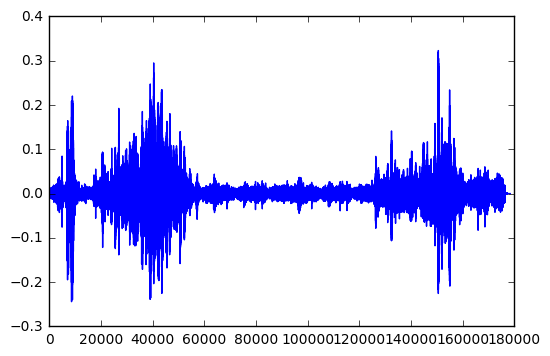

In [75]:
print(len(y))
matplotlib.pyplot.plot(y)

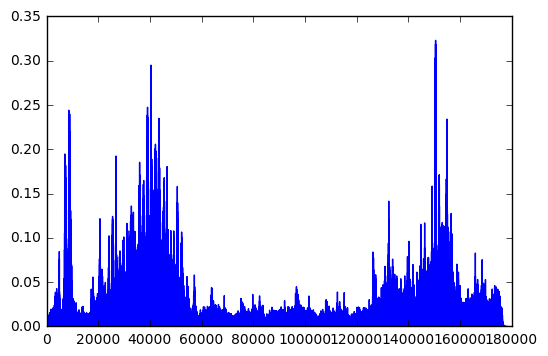

In [76]:
matplotlib.pyplot.plot(np.abs(y))

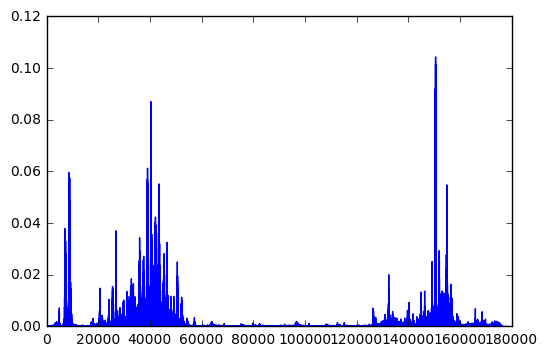

In [77]:
matplotlib.pyplot.plot(np.abs(y)**2)

In [78]:
def autodetec(y, power, thres):
    N = len(y)
    y_env = np.abs(y) ** power
    y2 = np.zeros(N)
    y2[y_env <= thres] = 1
    y2[y_env  > thres] = 2
    y3 = (y2[:-1] + y2[1:]).copy()
    y3[0] = 3
    y3[-1] = 3
    return np.where(y3 == 3)[0]

markers_on = autodetec(y, 2, 0.2)

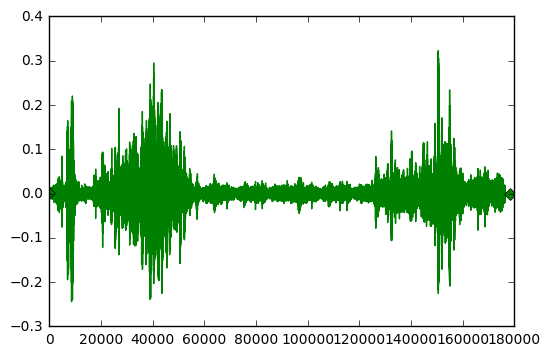

In [93]:
plt.plot(y, '-gD', markevery = markers_on.tolist())

In [111]:
def plot_with_marks(y, power, thres, n_fft):
    markers_on = autodetec(y, power, thres)
    markers_on = markers_on.tolist()
    D = librosa.stft(y, hop_length = n_fft, n_fft = n_fft)
    #print(D.shape)
    #print(np.max(D))
    D = librosa.amplitude_to_db(D, ref=np.max)
    #print(D.shape)
    #print(np.min(D))
    
    for frame in markers_on:
        #print(int(np.floor(frame/n_fft)))
        D[:, int(np.floor(frame/n_fft))] = 10
        
    #D[:,200] = -80
    librosa.display.specshow(D, y_axis='log', x_axis='time')
    plt.title('Power spectrogram')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.savefig("../pics/file.power_{}.thres_{}.nfft_{}.svg".format(power, thres, n_fft))


#plot_with_marks(y, 2, 0.2, 2048)

In [114]:
for i in range(100):
    for pot in range(1, 5):
        time.sleep(0.100)
        plot_with_marks(y, pot, i/100.0, 2048)
        plt.close('all')
    